# COGS 118A- Project Checkpoint

# Names

- Lingxi Li
- Jianghua Lu
- Yvonne Luo
- Man Kui Sit
- Robert Zhang

# Abstract 
The goal of our project is to estimate the sale price for different houses based on their features and conditions. The dataset we chose contains sample houses with different conditions and their actual final sale price. These condition and features measurements include housing location, area, home appliances (AC, pool, utilities), time measurements (the year built, the year sold), etc.. We will likely be choosing only some of the features to analyze as many of these features are related and can be combined. We will likely be using strategies such as one-hot encoding to process categorical data to make it fit for statistical analysis. We will develop several different models such as regression to predict sale prices and evaluate their performance by comparing the predicted sale price with the actual sale price. Success will be measured with how close the predicted price is to the actual price.


# Background

The current global pandemic has changed so many aspects of people’s lives. From global circuit chip shortages to lack of daily life products, everything is making it harder for people to get back to their old, carefree lives. Other than the obvious threat of COVID virus, one impact the pandemic is throwing at our shoulder is that living costs are continuously rising. One particular example is house pricing. A combination of stimulus, low mortgage rate, and simple high demand for housing due to the nature of work-from-home are all tempting people to buy new houses<a name="house price reason"></a>[<sup>[1]</sup>](#reason). As house pricing keeps skyrocketing and driving daily living expenses to the roof, predicting house prices is becoming a very relevant problem. What factors are contributing to a huge house check, how are different factors weighted, and given various feature variables, is there a consistent and accurate method for predicting house prices? These are the questions being magnified under the current special time, and we look to address them with a machine learning approach. 
<br>
The idea of this project stems from an on-going Kaggle challenge<a name="house price pred"></a>[<sup>[2]</sup>](#pred) with over 4000 participants. This competition originated back in 2016, but the data is still extremely valuable because the feature set is extensive and contains every possible description of a house. Similar work in the related area from Varma et al. also addresses the problem of predicting house prices using regression techniques<a name="other paper"></a>[<sup>[3]</sup>](#paper). Our work aims at developing an effective regression model by comparing various different popular ones and tries to yield the most effective one.

# Problem Statement

The problem we are trying to solve is predicting housing price based on its condition and features(specific feature selection to be determined). Some examples of features include: Neighborhood(Physical locations within Ames city limits), LotArea(Lot size in square feet), Utilities(Type of utilities available), YearBuilt(Original construction date), etc. More detailed descriptions and definitions of features will be included in the data section. This problem is quantifiable because all measurements are either originally numerical or can be encoded numerically using strategies such as one-hot encoding; the problem is measurable because the final predicted result price can be directly compared to the actual price using the difference between the predicted and actual price, R^2, and Root Mean Square Error as the metrics; the problem is replicable because all the machine learning models can be selected, trained, and tested based on the data we found repeatedly in order to verify the result.


# Data

The dataset originates from an open source machine learning competition from Kaggle. In total it contains roughly 3000 data samples containing house sales in the past 20 years. The dataset contains extremely comprehensive all-around descriptions of every aspect of a house, some of which are even a bit repetitive. The information ranges from house overall dwelling type, house built material, and house condition, to minute details and walkway pavement material, basement height, or number of fireplaces. For the sake of our prediction, such exhaustive information is both conducive for the task, since the more informative details we have, the better our model is supposed to generalize. On the other hand, too many repetitive features might only add up to the training complexity, and even render our model hard to apply in a real world setting as it might be hard to gather all such information about a house. Thus, some extent of data selection and preprocessing is needed. Some repetitive features, such as road access and alley access type, can be combined into one. Some features like exterior finish material are broken up into two separate columns, one for only one material and another for multiple materials used. Such can also be combined into one. Some features, such as basement area, basement height, basement material, basement conditions, etc. are all descriptions of the basement and might be too detailed for the task. So we will use some data selection and preprocessing to trim them down into lower dimensionality. 



<AxesSubplot:>

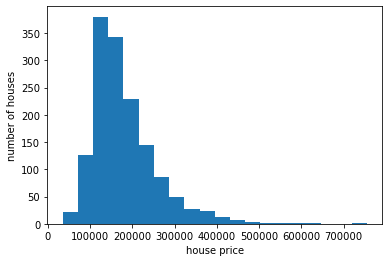

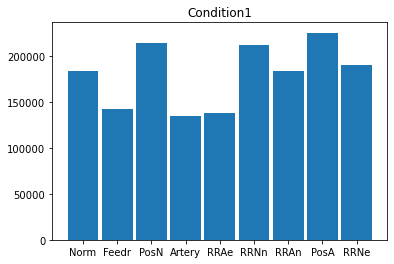

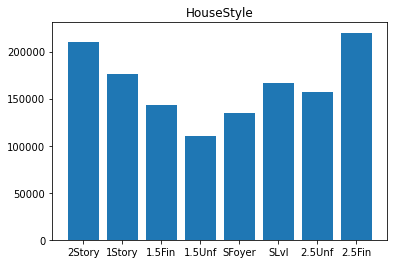

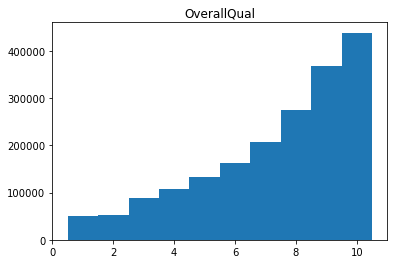

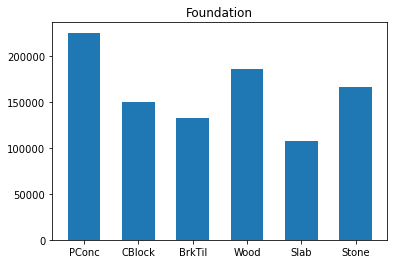

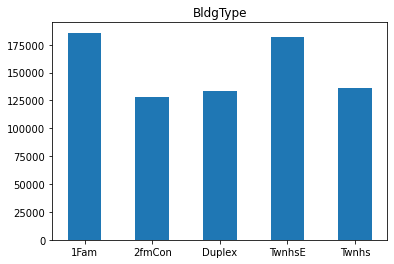

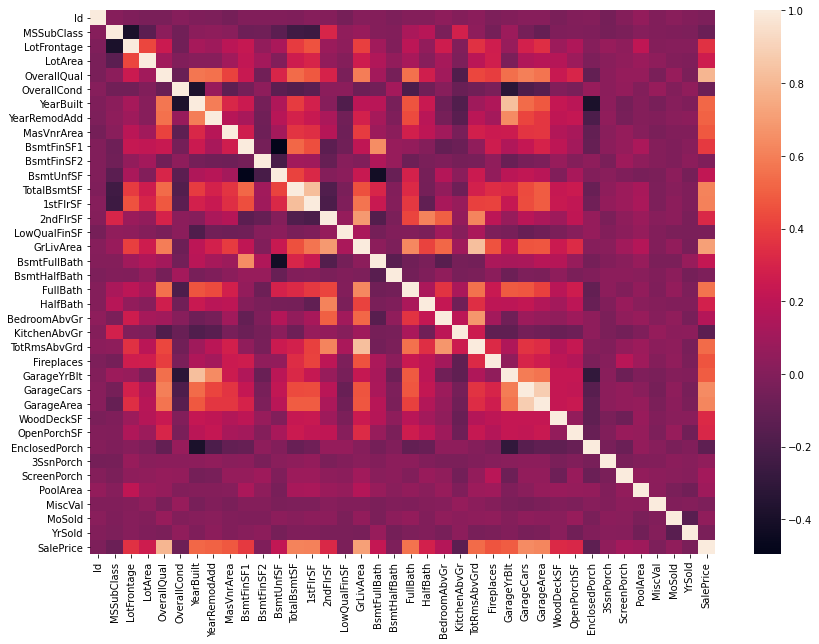

In [1]:
import numpy as np
import pandas as pd
import sklearn 
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

data = pd.read_csv('./data/train.csv')

plt.hist(data.SalePrice, bins=20)
plt.xlabel('house price')
plt.ylabel('number of houses')

def hist_avg(data, feature):
    f = data[feature]
    price = data.SalePrice
    
    d = {}
    
    for i in range(len(f)):
        if f[i] not in list(d.keys()):
            d[f[i]] = []
        d[f[i]].append(price[i])
        
    d_avg = {k : np.average(v) for k, v in d.items()}
    n = len(d_avg.keys())
    plt.figure()
    plt.bar(d_avg.keys(), d_avg.values(), width=n/10)
    plt.title(feature)
    
feature = 'Condition1'
hist_avg(data, feature)

feature = 'HouseStyle'
hist_avg(data, feature)

feature = 'OverallQual'
hist_avg(data, feature)

feature = 'Foundation'
hist_avg(data, feature)

feature = 'BldgType'
hist_avg(data, feature)

corr = data.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Proposed Solution

Our overall task is to predict future house prices based on current data. This is a traditional regression task. Our solution to the problem consists of two major parts, a feature selection step and a model selection step. We consider the feature selection part necessary because the dataset we are using contains a huge amount of observation variables. Some features are highly overlapping, such as dwelling style and dwelling type. We suppose that a lot of repetitive features can be cut down to save computational cost, promote model simplicity, and also boost our model generality, since not all houses will have all the necessary features, thus posing a problem to deploy the model in real life. The second component of our solution is to develop a machine learning model so as to predict future house prices. A variety of regression models are suitable for the nature of our task. From the most basic least square solution to the trending deep neural network, each popular model has its own advantages. In our work, we wish to explore the differences between some of the most popular models, and seek to combine their performance for the best result. Some models to choose from include: logistic regression, which can be used as our benchmark because of its low complexity but high generality, random forest, boosting, and multi-layer perceptron. Random forest has been proved to be one of the best performing algorithms with tabular style data. Boosting represents the power of combining multiple models for the best performance. For neural networks, we choose multi-layer perceptron because our tabular style data doesn’t really possess the feature locality property needed by models such as Convolutional neural networks. We will evaluate all these models using both R^2 and Root Mean Square Error (RMSE). We wish to select the best model out of them and come up with the best solution. 

# Evaluation Metrics

Since we are going to predict future housing prices based on current data, we will implement a regression model. R^2, coefficient of determination, is a popular evaluation metric for goodness of fit when it comes to regression tasks. It is “the proportion of the variance in the dependent variable that is predictable from the independent variable”[1]. The value of R^2 ranges from 0 to 1 (R^2 of a model could be less than zero/negative, which is worse than R^2=0 that’s always predicting the mean value of y), and a R^2 value of 1 is the best scenario when the model gives perfect predictions. In the context of our project, we interpret R^2 as the proportion of the variance in the target variable (selling prices) that can be explained by the features (utilities, house style, year built, etc.)


# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



# Ethics & Privacy

Our research question and hypothesis are designed to explore the house pricing dataset and train a model to make good predictions based on some features. The dataset we will be using is a public, open-source dataset on Kaggle, which gives us the right to perform data analysis and modeling on it. The dataset is anonymized so we will not violate any personal rights regarding the properties. Our project repository is open to the COGS 118A staff members for any investigation and will undergo further peer review processes later on in the project. Still, we will be cautious and will address potential ethics/privacy related concerns if there are any during our research. 

# Team Expectations 

- Team Expectation 1: We expect to communicate effectively (discord, emails) and help each other out if anyone is experiencing any difficulties during the project.
- Team Expectation 2: We expect to complete scheduled tasks (for individuals or as a group) on time (before meetings) and have meaningful in-person or online discussions every time we meet.
- Team Expectation 3: We expect to make every decision as a group, and resort to the professor/TAs in the class for any clarifications when in doubt.

# Project Timeline Proposal

UPDATE THE PROPOSAL TIMELINE ACCORDING TO WHAT HAS ACTUALLY HAPPENED AND HOW IT HAS EFFECTED YOUR FUTURE PLANS

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic (Pelé) | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets (Beckenbaur)  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data ,do some EDA (Maradonna) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin programming for project (Cruyff) | Discuss/edit project code; Complete project |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Carlos)| Discuss/edit full project |
| 3/19  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="house price reason"></a>1.[^](#reason): Why House prices surged as the COVID-19 pandemic took hold. Dallasfed.org. (n.d.). Retrieved April 24, 2022, from https://www.dallasfed.org/research/economics/2021/1228.aspx  <br> 

<a name="house pred"></a>2.[^](#pred): House prices - advanced regression techniques. Kaggle. (n.d.). Retrieved April 24, 2022, from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/description  <br> 

<a name="other paper"></a>3.[^](#paper): A. Varma, A. Sarma, S. Doshi and R. Nair, "House Price Prediction Using Machine Learning and Neural Networks," 2018 Second International Conference on Inventive Communication and Computational Technologies (ICICCT), 2018, pp. 1936-1939, doi: 10.1109/ICICCT.2018.8473231.  <br> 